In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [3]:
sep_coins = cv2.imread('pennies.jpg')

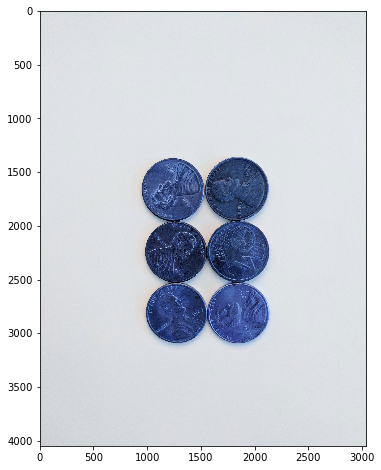

In [4]:
display(sep_coins)

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)

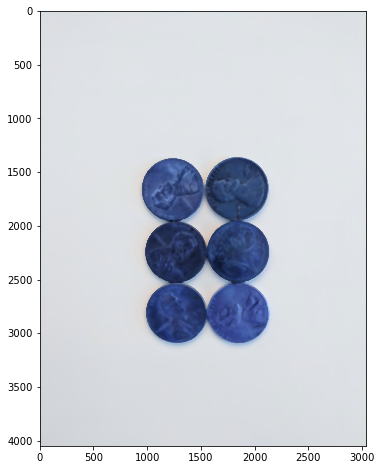

In [6]:
display(sep_blur)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

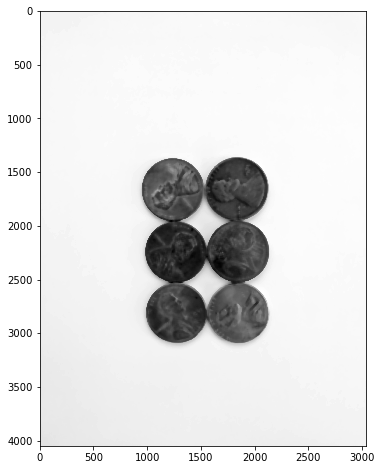

In [8]:
display(gray_sep_coins,cmap='gray')

In [9]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

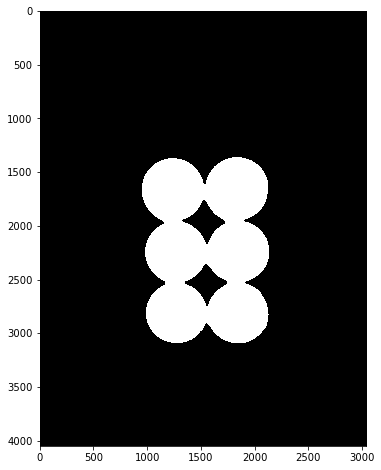

In [10]:
display(sep_thresh,cmap='gray')

In [13]:
image = sep_thresh.copy()

In [14]:
contours,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [22]:
# For every entry in contours
for i in range(len(contours)):
    # Last column in the array is -1 if an external contour
    if hierarchy[0][i][3] == -1:
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

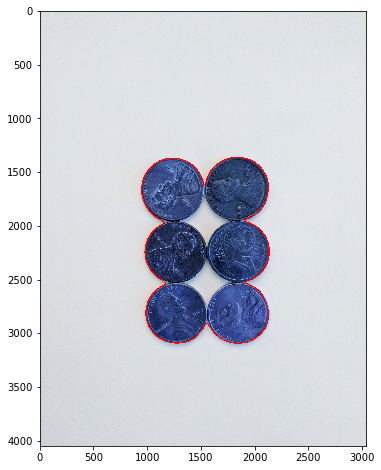

In [23]:
display(sep_coins)

In [24]:
img = cv2.imread('pennies.jpg')

In [25]:
img = cv2.medianBlur(img,35)

In [26]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [27]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

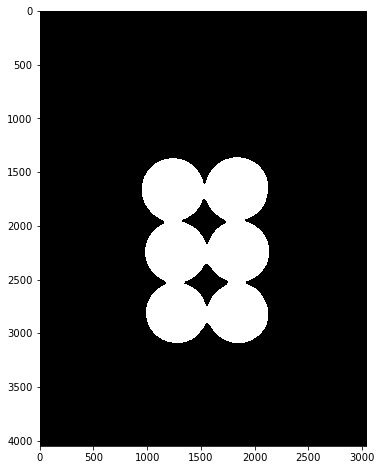

In [28]:
display(thresh,cmap='gray')

In [29]:
# Noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

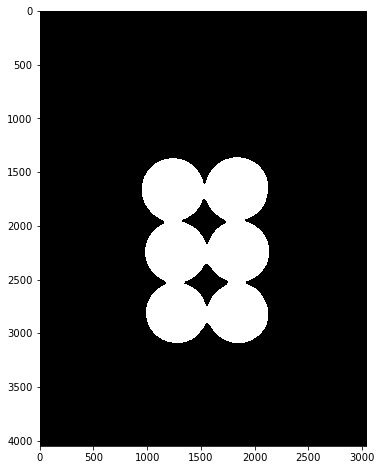

In [30]:
display(opening,cmap='gray')

In [31]:
# Grab backgrond that you are sure of
sure_bg = cv2.dilate(opening,kernel,iterations=3)

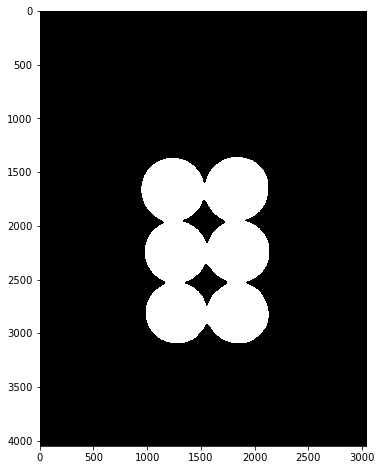

In [32]:
display(sure_bg,cmap='gray')

In [34]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

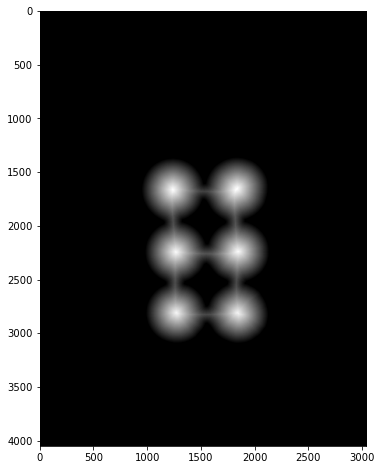

In [35]:
display(dist_transform,cmap='gray')

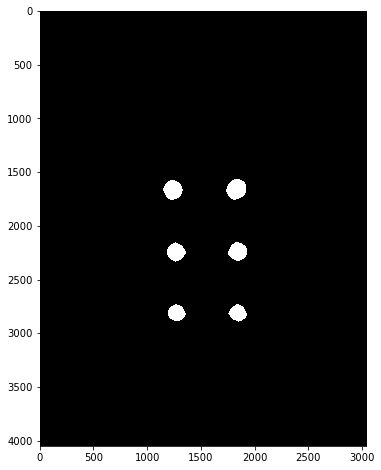

In [36]:
display(sure_fg,cmap='gray')

In [37]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

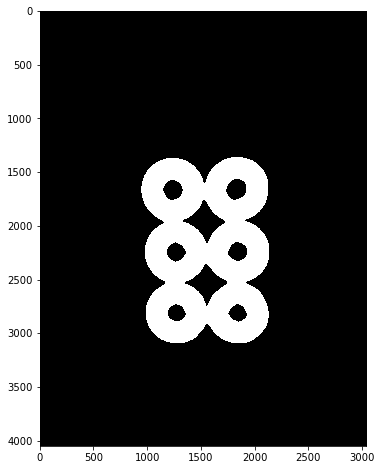

In [38]:
display(unknown,cmap='gray')

In [39]:
# Mark labeling
ret,markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0
markers = markers+1

# Now mark the region of unknown with zero
markers[unknown==255] = 0

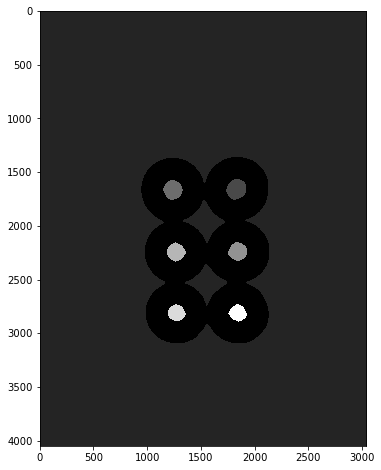

In [40]:
display(markers,cmap='gray')

In [41]:
markers = cv2.watershed(img,markers)

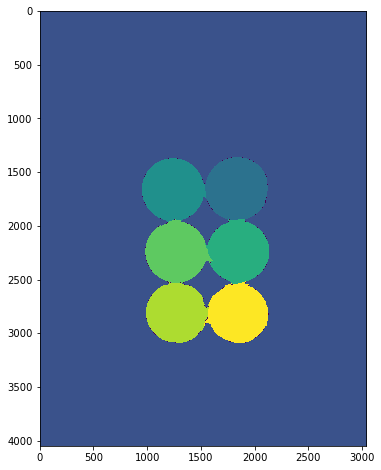

In [42]:
display(markers)

In [45]:
image = markers.copy()
contours,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
    # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

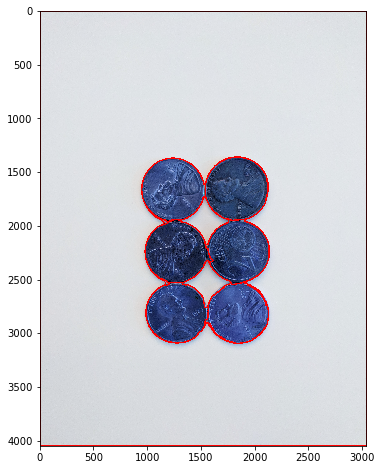

In [46]:
display(sep_coins)